In [1]:
import os
import sys
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
os.environ['GOLD_DIR']    = '/cosma5/data/durham/{}/GAMA4/'.format(os.environ['USER'])
os.environ['RANDOMS_DIR'] = '/cosma5/data/durham/{}/GAMA4/randoms/'.format(os.environ['USER'])

In [4]:
from findfile import findfile, gather_cat, fetch_fields
from vmaxer   import vmaxer_rand
from volfracs import volfracs

In [5]:
dryrun = False
survey = 'gama'
prefix = 'randoms_ddp1'

In [6]:
fields = fetch_fields(survey)

In [7]:
rpaths = [findfile(ftype='randoms_bd_ddp_n8', dryrun=dryrun, field=ff, survey=survey, prefix=prefix) for ff in fields]
rpaths

['/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits',
 '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits',
 '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits']

In [8]:
rand   = vmaxer_rand(survey=survey, ftype='randoms_bd_ddp_n8', dryrun=dryrun, prefix=prefix)

Unique tiers: [0 1 2 3 4 5 6 7 8]
DDP1 randoms: 0.039076 < z < 0.262990

IN_D8LUMFN 0.20645483074746673
DDP1_d0_VOLFRAC OF 0.206455 added.
DDP1_d0_TIERMED d8 OF -0.893990 added.
DDP1_d0_ZEROPOINT_VOLFRAC OF 0.1588893164 added.
DDP1_d0_ZEROPOINT_TIERMED d8 OF -0.849692 added.

IN_D8LUMFN 0.08664516232669268
DDP1_d1_VOLFRAC OF 0.086645 added.
DDP1_d1_TIERMED d8 OF -0.652000 added.
DDP1_d1_ZEROPOINT_VOLFRAC OF 0.0948476750 added.
DDP1_d1_ZEROPOINT_TIERMED d8 OF -0.652002 added.

IN_D8LUMFN 0.06792774899911071
DDP1_d2_VOLFRAC OF 0.067928 added.
DDP1_d2_TIERMED d8 OF -0.488914 added.
DDP1_d2_ZEROPOINT_VOLFRAC OF 0.0735395232 added.
DDP1_d2_ZEROPOINT_TIERMED d8 OF -0.489322 added.

IN_D8LUMFN 0.13064637053036401
DDP1_d3_VOLFRAC OF 0.130646 added.
DDP1_d3_TIERMED d8 OF -0.225372 added.
DDP1_d3_ZEROPOINT_VOLFRAC OF 0.1418135643 added.
DDP1_d3_ZEROPOINT_TIERMED d8 OF -0.225472 added.

IN_D8LUMFN 0.1373273049552941
DDP1_d4_VOLFRAC OF 0.137327 added.
DDP1_d4_TIERMED d8 OF 0.294919 added.
DDP1_d4_

In [9]:
np.unique(rand['FIELD'], return_counts=True)

(<Column name='FIELD' dtype='bytes3' length=3>
 G12
 G15
  G9,
 array([1265792, 1265792, 1265792]))

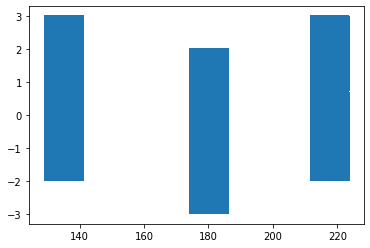

In [10]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0)

In [11]:
rand.meta

OrderedDict([('ZMIN', 0.0390699990093708),
             ('ZMAX', 0.2629899978637695),
             ('DZ', 0.0001),
             ('NRAND', 1265792),
             ('FIELD', 'G15'),
             ('AREA', 180.0),
             ('VOL', 2531584.717921398),
             ('RAND_DENS', 0.4999998582071158),
             ('VOL8', 2144.660584850632),
             ('OVERSAMPLE', 1),
             ('SEED', 364),
             ('PREFIX', 'randoms_ddp1'),
             ('REALZ', 0),
             ('NRAND8', 1072.329988327706),
             ('NRAND8_PERR', 32.74645001107304),
             ('EXTNAME', 'RANDOMS'),
             ('RSPHERE', 8.0),
             ('IMMUTABLE', 'False'),
             ('GOLD_NGAL', 113687),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', 0.0390699990093708),
             ('DDP1_ZMAX', 0.2629899978637695),
             ('DDP1_VZ', 7594754.153764196),
             ('DDP1ZLIMS_NGAL', 113687),
             ('DDP1_NGAL', 45293),
             ('DDP1_DENS', 0.005963

In [12]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

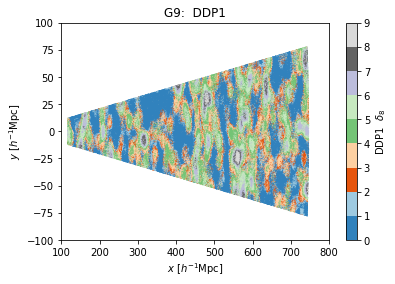

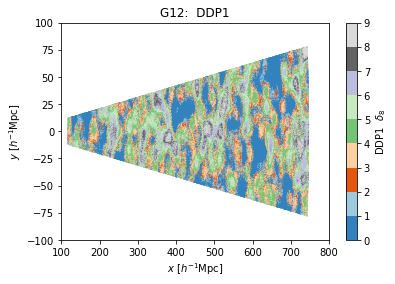

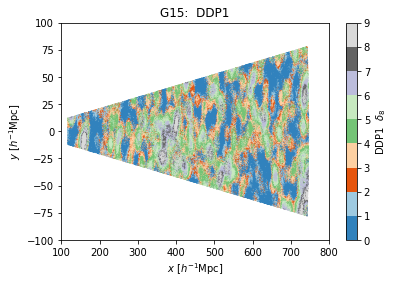

In [15]:
for field in ['G9', 'G12', 'G15']:
    pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]    
    isin      = (rand['FIELD'] == field)
        
    fills     = rand['DDP1_DELTA8_TIER'].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
      
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=2,\
                cmap=cmap,\
                norm=norm)
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP1  $\delta_8$')
    
    plt.title('{}:  DDP1'.format(field))
        
    pl.show()

Unique tiers: [0 1 2 3 4 5 6 7 8]
DDP1 randoms: 0.040970 < z < 0.261820

IN_D8LUMFN 0.278713030585686
DDP1_d0_VOLFRAC OF 0.278713 added.
DDP1_d0_TIERMED d8 OF -0.897070 added.
DDP1_d0_ZEROPOINT_VOLFRAC OF 0.2175212927 added.
DDP1_d0_ZEROPOINT_TIERMED d8 OF -0.851124 added.

IN_D8LUMFN 0.11004981528021604
DDP1_d1_VOLFRAC OF 0.110050 added.
DDP1_d1_TIERMED d8 OF -0.652693 added.
DDP1_d1_ZEROPOINT_VOLFRAC OF 0.1220800222 added.
DDP1_d1_ZEROPOINT_TIERMED d8 OF -0.652383 added.

IN_D8LUMFN 0.08567576484580888
DDP1_d2_VOLFRAC OF 0.085676 added.
DDP1_d2_TIERMED d8 OF -0.488637 added.
DDP1_d2_ZEROPOINT_VOLFRAC OF 0.0919006383 added.
DDP1_d2_ZEROPOINT_TIERMED d8 OF -0.489191 added.

IN_D8LUMFN 0.1682660779529708
DDP1_d3_VOLFRAC OF 0.168266 added.
DDP1_d3_TIERMED d8 OF -0.224332 added.
DDP1_d3_ZEROPOINT_VOLFRAC OF 0.1817636564 added.
DDP1_d3_ZEROPOINT_TIERMED d8 OF -0.224682 added.

IN_D8LUMFN 0.1784348307787558
DDP1_d4_VOLFRAC OF 0.178435 added.
DDP1_d4_TIERMED d8 OF 0.297645 added.
DDP1_d4_ZER

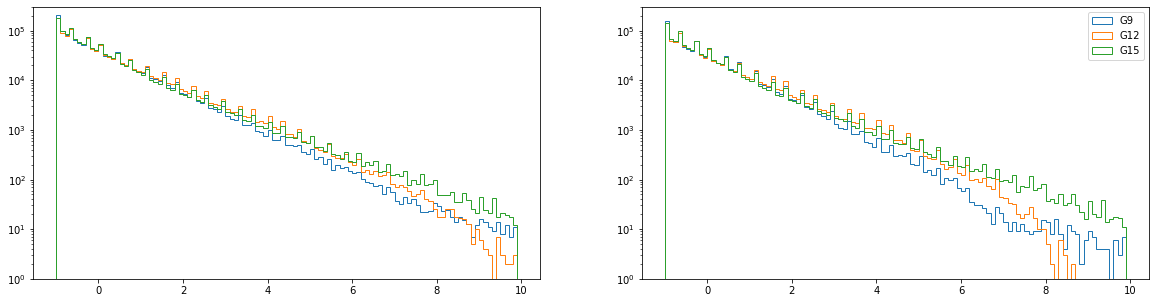

In [16]:
fieldrands = {}

fig, axes = plt.subplots(1, 2, figsize=(20,5))

for field in ['G9', 'G12', 'G15']:
    isin      = (rand['FIELD'] == field)
    fills     = rand['DDP1_DELTA8'].data[isin]
    
    axes[0].hist(fills, bins=np.arange(-1., 10., 0.1), histtype='step', label=field)

    
    isin      = (rand['FIELD'] == field) & (rand['FILLFACTOR'] > 0.8)
    fills     = rand['DDP1_DELTA8'].data[isin]
    
    axes[1].hist(fills, bins=np.arange(-1., 10., 0.1), histtype='step', label=field)

    fieldrands[field] = volfracs(rand[isin])
    
for ax in axes:
    ax.set_ylim(1., 3.e5)
    ax.set_yscale('log')

pl.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


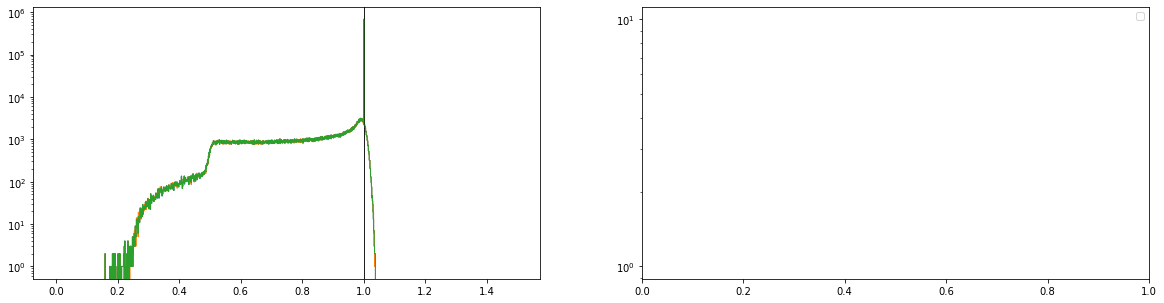

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

for field in ['G9', 'G12', 'G15']:
    isin      = (rand['FIELD'] == field)
    fills     = rand['FILLFACTOR'].data[isin]
    
    axes[0].hist(fills, bins=np.arange(0., 1.5, 1.e-3), histtype='step', label=field)
    '''
    isin      = (rand['FIELD'] == field) & (rand['FILLFACTOR'] > 0.8)
    fills     = rand['FILLFACTOR'].data[isin]
    
    axes[1].hist(fills, bins=np.arange(-1., 10., 0.1), histtype='step', label=field)
    '''
    
    axes[0].axvline(1.0, c='k', lw=0.5)
    
for ax in axes:
    # ax.set_ylim(1., 3.e5)
    ax.set_yscale('log')

pl.legend()

In [18]:
def dfilter(mydict):
    return  {k: v for k, v in mydict.items() if k.startswith('DDP1_d')}

In [19]:
hdrs = [dfilter(fieldrands[ff].meta) for ff in fields]

print('{}\t{}\t\t{}\t\t{}'.format(''.ljust(25), 'G9', 'G12', 'G15'))
print()

for key in hdrs[0].keys():    
    print('{}\t{}\t{}\t{}'.format(key.ljust(25), hdrs[0][key], hdrs[1][key], hdrs[2][key]))

                         	G9		G12		G15

DDP1_d0_VOLFRAC          	0.278713	0.255520	0.264099
DDP1_d0_TIERMEDd8        	-0.897070	-0.894475	-0.890269
DDP1_d0_ZEROPOINT_VOLFRAC	0.217521	0.196408	0.200474
DDP1_d0_ZEROPOINT_TIERMEDd8	-0.851124	-0.850865	-0.84699
DDP1_d1_VOLFRAC          	0.110050	0.109771	0.115224
DDP1_d1_TIERMEDd8        	-0.652693	-0.651649	-0.651673
DDP1_d1_ZEROPOINT_VOLFRAC	0.122080	0.118696	0.125987
DDP1_d1_ZEROPOINT_TIERMEDd8	-0.652383	-0.651354	-0.652243
DDP1_d2_VOLFRAC          	0.085676	0.087275	0.089716
DDP1_d2_TIERMEDd8        	-0.488637	-0.488822	-0.489268
DDP1_d2_ZEROPOINT_VOLFRAC	0.091901	0.094235	0.098231
DDP1_d2_ZEROPOINT_TIERMEDd8	-0.489191	-0.488835	-0.489911
DDP1_d3_VOLFRAC          	0.168266	0.165070	0.171856
DDP1_d3_TIERMEDd8        	-0.224332	-0.227546	-0.224304
DDP1_d3_ZEROPOINT_VOLFRAC	0.181764	0.180497	0.186113
DDP1_d3_ZEROPOINT_TIERMEDd8	-0.224682	-0.22674	-0.225014
DDP1_d4_VOLFRAC          	0.178435	0.174504	0.178087
DDP1_d4_TIERMEDd8        	0.2

# Done.